In [6]:
#Import Data structure libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import csv
from ast import literal_eval

#Import libraries for controlling crawling rate
from time import sleep, time
from random import randint

from IPython.display import Image
# from selenium import webdriver
import time
import re
from gettext import find

import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval
# import googlemaps
import re
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import random 

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, recall_score, precision_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
restaurant_data = pd.read_csv("/content/drive/MyDrive/ml_cities/restaurant_review_text_p2-p4.csv")
restaurant_data.head()

,Unnamed: 0,restaurant name,ranking,location,price range,CUISINES,Special Diets,number of total review,overall rate,each reviewer name,each review tittle,review text,each rate value
0,0,ICHIRAN Brooklyn,"#270 of 2,818 Restaurants in Brooklyn","374 Johnson Ave Just off Morgan Avenue, Brookl...",None,None,None,43,4.0,"['SHFT54', 'NQuoryo', '6izelle', '359td', 'Joy...","['Be ready to wait', 'Kahuna moods', 'Worst Di...","[""I've been to a the Fukuoka location in Japan...","[4.0, 5.0, 1.0, 5.0, 5.0, 3.0, 5.0, 5.0, 5.0, ..."
1,1,Tom's Restaurant,"#10 of 2,818 Restaurants in Brooklyn","782 Washington Ave, Brooklyn, NY 11238-4506",None,None,None,302,4.5,"['wills8272', '502sunea', '504kristinet', '850...","['Best pancakes ever', 'Great local atmosphere...",['Came here on my first day in NYC and was not...,"[5.0, 5.0, 3.0, 5.0, 4.0, 5.0, 5.0, 3.0, 3.0, ..."
2,2,Ivan Ramen,"#132 of 7,281 Restaurants in New York City","25 Clinton St, New York City, NY 10002-1793",None,"Japanese, Asian, Soups","Vegetarian Friendly, Vegan Options",342,4.5,"['lexmiller', 'm2HI', '170silvia', 'Nicolettat...","['Delicious!', 'As in Netflix', 'One of the be...","[""Excellent meal! Service was terrific, helpf...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, ..."
3,3,Sweet Chick,"#11 of 2,818 Restaurants in Brooklyn","164 Bedford Ave, Brooklyn, NY 11249-1367",None,American,Vegetarian Friendly,280,4.5,"['TYsadventures22', 'Bears123097', '588JimB588...","['My wheelchair has to come!', 'Great breakfas...","[""This is a holiday weekend and I chose to try...","[2.0, 5.0, 4.0, 2.0, 5.0, 2.0, 5.0, 5.0, 5.0, ..."
4,4,Boucherie West Village,"#4 of 7,281 Restaurants in New York City","99 7th Ave S, New York City, NY 10014-3415",$18 - $100,"French, Steakhouse","Vegetarian Friendly, Vegan Options, Gluten Fre...",1230,4.5,"['Journey08724540492', 'Michael B', 'Rdillonny...","['Feels like in Paris!!!!', 'Dinner with frien...",['This is a very cozy French restaurant in the...,"[5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, ..."


# Do binary classification using GaussianNB

In [ ]:
corpus = []
all_review = []
for i in range(int(len(restaurant_data)*0.5)):
    restaurant = []
    for j in range(len(literal_eval(restaurant_data['review text'][i]))):
        review = re.sub('[^a-zA-Z]',' ',literal_eval(restaurant_data['review text'][i])[j])
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        filter_sentence = [ps.stem(w) for w in review if not w in set(stopwords.words('english'))]
        filter_sentence = ' '.join(review)
        restaurant.append(filter_sentence)
        all_review.append(filter_sentence)
    corpus.append(restaurant)


In [ ]:
cv = CountVectorizer()
X = np.array(cv.fit_transform(all_review).todense())
y=[]
for i in range(int(len(restaurant_data)*0.5)):
    y.extend(literal_eval(restaurant_data['each rate value'].values[i]))
y = np.array(y)

In [ ]:
y_PorN = np.zeros(len(y),dtype=float)
for i in range(len(y)):
    if y[i] >= 4:
        y_PorN[i] = 1
    else:
        y_PorN[i] = -1
y_PorN

array([ 1.,  1., -1., ...,  1.,  1.,  1.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y_PorN,test_size = 0.2,random_state=0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Accuracy Score is:  0.3354908740049851


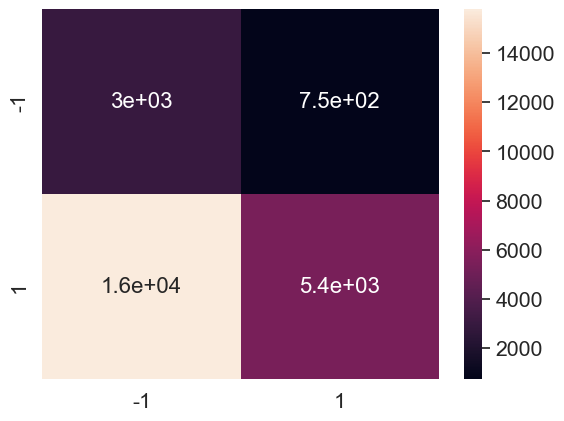

In [ ]:
y_pred = classifier.predict(X_test)
Confustion_Matrix = confusion_matrix(y_test,y_pred)
Accuracy_Score = accuracy_score(y_test,y_pred)
df_cm = pd.DataFrame(Confustion_Matrix, [-1,1], [-1,1])
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) #font size
print("Accuracy Score is: ",Accuracy_Score)

# TF-IDF + RandomForest

In [4]:
all_review = []
for i in range(len(restaurant_data)):
  for j in range(len(literal_eval(restaurant_data['review text'][i]))):
    review = re.sub('[^a-zA-Z]',' ',literal_eval(restaurant_data['review text'][i])[j])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    filter_sentence = [ps.stem(w) for w in review if not w in set(stopwords.words('english'))]
    filter_sentence = ' '.join(review)
    all_review.append(filter_sentence)

In [5]:
y = []
for i in range(len(restaurant_data)):
    y.extend(literal_eval(restaurant_data['each rate value'].values[i]))
y = np.array(y)
y_PorN = np.zeros(len(y), dtype=float)
for i in range(len(y)):
    if y[i] >= 4:
        y_PorN[i] = 1
    else:
        y_PorN[i] = -1

## random forest

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_review,y_PorN,test_size = 0.2,random_state=10)
pipeline = Pipeline(
    [
        ('vect', TfidfVectorizer(lowercase=True, max_features=10000, ngram_range=(1,2))),
        ('clf', RandomForestClassifier(max_features='sqrt', n_estimators=1000, n_jobs=-1))
    ]
)

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.8851958858199468


In [ ]:
sample_review = "omg it was really bad"
y = pipeline.predict([sample_review])
print(y)

[-1.]


In [ ]:
import joblib
joblib.dump(pipeline, "./random_forest_model.joblib")

['./random_forest_model.joblib']

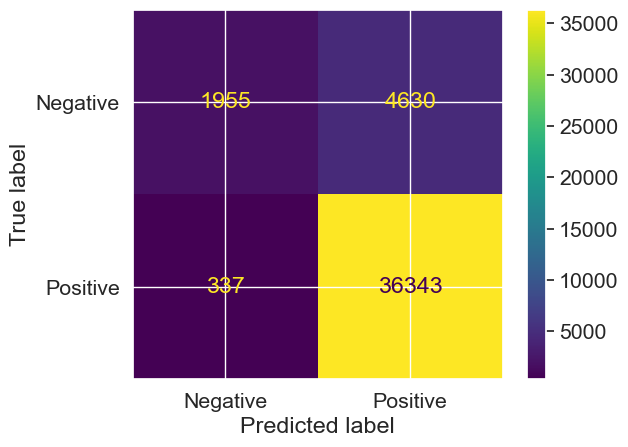

AttributeError: 'ConfusionMatrixDisplay' object has no attribute 'savefig'

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative','Positive'])
disp.plot()
# disp.xaxis.set_ticklabels(['Positive','Negative'])
plt.show()
disp.savefig('confusion_matrix.svg')

# SVM & Naive Bayes

In [8]:

from sklearn import model_selection, naive_bayes, svm
Tfidf_vect = TfidfVectorizer(max_features=10000)
Tfidf_vect.fit(all_review)

TfidfVectorizer(max_features=10000)

## ratio 8:2, binary classification

In [25]:
X_train, X_test, y_train, y_test = train_test_split(all_review,y_PorN,test_size = 0.2,random_state=10)
X_train_tfidf = Tfidf_vect.transform(X_train)
X_test_tfidf = Tfidf_vect.transform(X_test)

### SVM and naive bayes

In [10]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_tfidf, y_train)
NB = GaussianNB()
NB.fit(X_train_tfidf.toarray(), y_train)

GaussianNB()

In [11]:
svm_pred = SVM.predict(X_test_tfidf)
NB_pred = NB.predict(X_test_tfidf.toarray())

In [12]:
print(f" SVM Accuracy: {accuracy_score(y_test, svm_pred)}")
print(f" SVM precision score: {precision_score(y_test, svm_pred)}")
print(f" SVM recall score: {recall_score(y_test, svm_pred)}")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, NB_pred)}")
print(f"Naive Bayes precision score: {precision_score(y_test, NB_pred)}")
print(f"Naive Bayes recall score: {recall_score(y_test, NB_pred)}")

 SVM Accuracy: 0.9196096057531784
 SVM precision score: 0.9265045510120907
 SVM recall score: 0.9876900796524257
Naive Bayes Accuracy: 0.4570437909336073
Naive Bayes precision score: 0.9011087803416242
Naive Bayes recall score: 0.4354815351194786


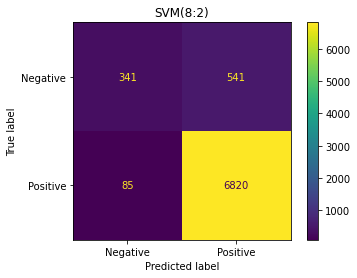

In [21]:
cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative','Positive'])
disp.plot()
# disp.xaxis.set_ticklabels(['Positive','Negative'])
plt.title("SVM(8:2)")
plt.savefig('/content/drive/MyDrive/ml_cities/fig/SVM(8:2)_binary')
plt.show()
# disp.savefig('confusion_matrix.svg')

In [ ]:
cm = confusion_matrix(y_test, NB_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative','Positive'])
disp.plot()
# disp.xaxis.set_ticklabels(['Positive','Negative'])
plt.title("Naive Bayes(8:2)")
plt.savefig('/content/drive/MyDrive/ml_cities/fig/NaiveBayes(8:2)_binary')
plt.show()
# disp.savefig('confusion_matrix.svg')

In [15]:
pipeline = Pipeline(
    [
        ('vect', TfidfVectorizer(lowercase=True, max_features=10000, ngram_range=(1,2))),
        ('clf', RandomForestClassifier(max_features='sqrt', n_estimators=1000, n_jobs=-1))
    ]
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred)}")
print(f"recall_score: {recall_score(y_test, y_pred)}")


Accuracy: 0.903043534095287
precision_score: 0.9035433070866141
recall_score: 0.997103548153512


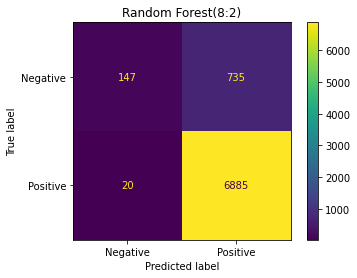

In [23]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative','Positive'])
disp.plot()
plt.title("Random Forest(8:2)")
plt.savefig('/content/drive/MyDrive/ml_cities/fig/RandomForest(8:2)_binary')
plt.show()

## ratio 8:2 multi classification

In [26]:
X_train, X_test, y_train, y_test = train_test_split(all_review,y,test_size = 0.2,random_state=10)
X_train_tfidf = Tfidf_vect.transform(X_train)
X_test_tfidf = Tfidf_vect.transform(X_test)
SVM.fit(X_train_tfidf, y_train)
NB.fit(X_train_tfidf.toarray(), y_train)
svm_pred = SVM.predict(X_test_tfidf)
NB_pred = NB.predict(X_test_tfidf.toarray())
# print(f" SVM Accuracy: {accuracy_score(y_test, svm_pred)}")
# print(f" SVM precision score: {precision_score(y_test, svm_pred)}")
# print(f" SVM recall score: {recall_score(y_test, svm_pred)}")
# print(f"Naive Bayes Accuracy: {accuracy_score(y_test, NB_pred)}")
# print(f"Naive Bayes precision score: {precision_score(y_test, NB_pred)}")
# print(f"Naive Bayes recall score: {recall_score(y_test, NB_pred)}")

 SVM Accuracy: 0.6810068062154874


ValueError: ignored

In [29]:
print(f" SVM Accuracy: {accuracy_score(y_test, svm_pred)}")
print(f" SVM precision score: {precision_score(y_test, svm_pred, average = 'weighted')}")
print(f" SVM recall score: {recall_score(y_test, svm_pred,average = 'weighted')}")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, NB_pred)}")
print(f"Naive Bayes precision score: {precision_score(y_test, NB_pred, average = 'weighted' )}")
print(f"Naive Bayes recall score: {recall_score(y_test, NB_pred, average = 'weighted')}")

 SVM Accuracy: 0.6810068062154874
 SVM precision score: 0.6348626304897719
 SVM recall score: 0.6810068062154874
Naive Bayes Accuracy: 0.236933350455888
Naive Bayes precision score: 0.5032646562460273
Naive Bayes recall score: 0.236933350455888


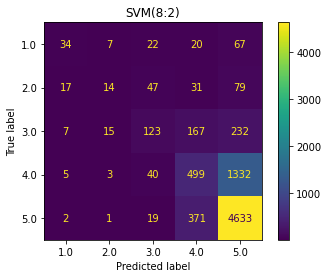

In [30]:
cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM.classes_)

disp.plot()
# disp.xaxis.set_ticklabels(['Positive','Negative'])
plt.title("SVM(8:2)")
plt.savefig('/content/drive/MyDrive/ml_cities/fig/SVM(8:2)_multi')
plt.show()
# disp.savefig('confusion_matrix.svg')

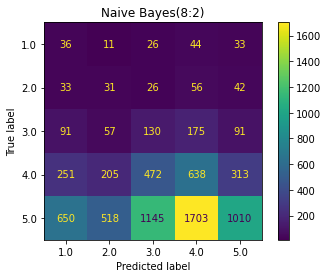

In [31]:
cm = confusion_matrix(y_test, NB_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NB.classes_)
disp.plot()
# disp.xaxis.set_ticklabels(['Positive','Negative'])
plt.title("Naive Bayes(8:2)")
plt.savefig('/content/drive/MyDrive/ml_cities/fig/NaiveBayes(8:2)_multi')
plt.show()
# disp.savefig('confusion_matrix.svg')

In [32]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred, average = 'weighted')}")
print(f"recall_score: {recall_score(y_test, y_pred, average = 'weighted')}")

Accuracy: 0.664440734557596
precision_score: 0.645100249145788
recall_score: 0.664440734557596


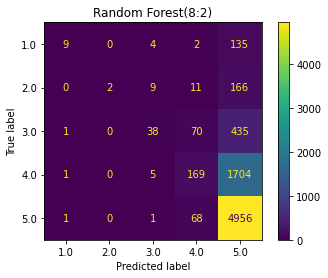

In [33]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()
plt.title("Random Forest(8:2)")
plt.savefig('/content/drive/MyDrive/ml_cities/fig/RandomForest(8:2)_multi')
plt.show()

## ratio 7:3, binary classification

In [34]:
X_train, X_test, y_train, y_test = train_test_split(all_review,y_PorN,test_size = 0.3,random_state=10)
X_train_tfidf = Tfidf_vect.transform(X_train)
X_test_tfidf = Tfidf_vect.transform(X_test)
SVM.fit(X_train_tfidf, y_train)
NB.fit(X_train_tfidf.toarray(), y_train)
svm_pred = SVM.predict(X_test_tfidf)
NB_pred = NB.predict(X_test_tfidf.toarray())
print(f" SVM Accuracy: {accuracy_score(y_test, svm_pred)}")
print(f" SVM precision score: {precision_score(y_test, svm_pred)}")
print(f" SVM recall score: {recall_score(y_test, svm_pred)}")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, NB_pred)}")
print(f"Naive Bayes precision score: {precision_score(y_test, NB_pred)}")
print(f"Naive Bayes recall score: {recall_score(y_test, NB_pred)}")

 SVM Accuracy: 0.9144691780821917
 SVM precision score: 0.9212220106971263
 SVM recall score: 0.9873688301593471
Naive Bayes Accuracy: 0.4865582191780822
Naive Bayes precision score: 0.9002795899347623
Naive Bayes recall score: 0.46929654100272056


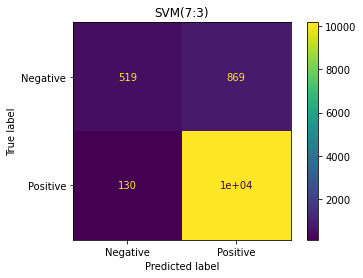

In [35]:
cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative','Positive'])
disp.plot()
# disp.xaxis.set_ticklabels(['Positive','Negative'])
plt.title("SVM(7:3)")
plt.savefig('/content/drive/MyDrive/ml_cities/fig/SVM(7:3)_binary')
plt.show()
# disp.savefig('confusion_matrix.svg')

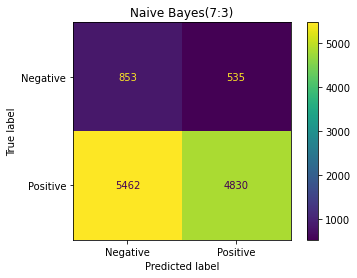

In [36]:
cm = confusion_matrix(y_test, NB_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative','Positive'])
disp.plot()
# disp.xaxis.set_ticklabels(['Positive','Negative'])
plt.title("Naive Bayes(7:3)")
plt.savefig('/content/drive/MyDrive/ml_cities/fig/NaiveBayes(7:3)_binary')
plt.show()
# disp.savefig('confusion_matrix.svg')

In [37]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred)}")
print(f"recall_score: {recall_score(y_test, y_pred)}")

Accuracy: 0.8970890410958904
precision_score: 0.8979163018735773
recall_score: 0.9965021375825884


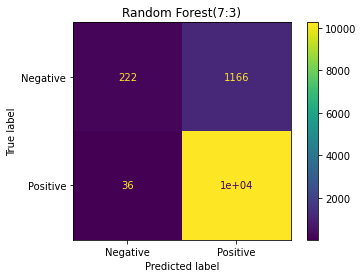

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative','Positive'])
disp.plot()
plt.title("Random Forest(7:3)")
plt.savefig('/content/drive/MyDrive/ml_cities/fig/RandomForest(7:3)_binary')
plt.show()

## ratio 7:3 multi classification

In [39]:
X_train, X_test, y_train, y_test = train_test_split(all_review,y,test_size = 0.3,random_state=10)
X_train_tfidf = Tfidf_vect.transform(X_train)
X_test_tfidf = Tfidf_vect.transform(X_test)
SVM.fit(X_train_tfidf, y_train)
NB.fit(X_train_tfidf.toarray(), y_train)
svm_pred = SVM.predict(X_test_tfidf)
NB_pred = NB.predict(X_test_tfidf.toarray())
print(f" SVM Accuracy: {accuracy_score(y_test, svm_pred)}")
print(f" SVM precision score: {precision_score(y_test, svm_pred,average = 'weighted')}")
print(f" SVM recall score: {recall_score(y_test, svm_pred,average = 'weighted')}")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, NB_pred)}")
print(f"Naive Bayes precision score: {precision_score(y_test, NB_pred,average = 'weighted')}")
print(f"Naive Bayes recall score: {recall_score(y_test, NB_pred,average = 'weighted')}")

 SVM Accuracy: 0.675513698630137
 SVM precision score: 0.6276448299150359
 SVM recall score: 0.675513698630137
Naive Bayes Accuracy: 0.2547945205479452
Naive Bayes precision score: 0.49472552194889174
Naive Bayes recall score: 0.2547945205479452


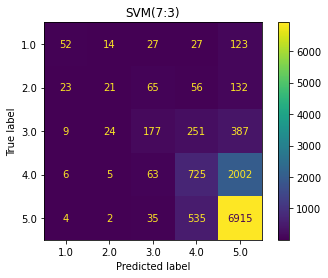

In [40]:
cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM.classes_)
disp.plot()
# disp.xaxis.set_ticklabels(['Positive','Negative'])
plt.title("SVM(7:3)")
plt.savefig('/content/drive/MyDrive/ml_cities/fig/SVM(7:3)_multi')
plt.show()
# disp.savefig('confusion_matrix.svg')

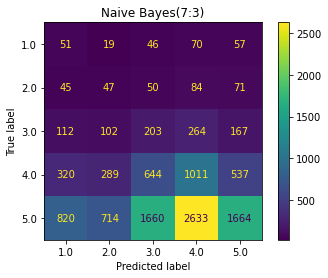

In [41]:
cm = confusion_matrix(y_test, NB_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NB.classes_)
disp.plot()
# disp.xaxis.set_ticklabels(['Positive','Negative'])
plt.title("Naive Bayes(7:3)")
plt.savefig('/content/drive/MyDrive/ml_cities/fig/NaiveBayes(7:3)_multi')
plt.show()
# disp.savefig('confusion_matrix.svg')

In [42]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred, average = 'weighted')}")
print(f"recall_score: {recall_score(y_test, y_pred, average = 'weighted')}")

Accuracy: 0.6591609589041096
precision_score: 0.6340946894793215
recall_score: 0.6591609589041096


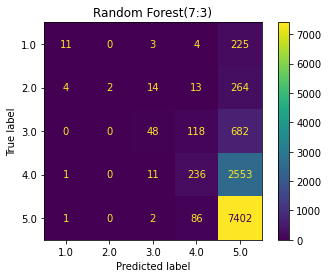

In [43]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()
plt.title("Random Forest(7:3)")
plt.savefig('/content/drive/MyDrive/ml_cities/fig/RandomForest(7:3)_multi')
plt.show()

# classify to different categories

## get the frequency of noun words as the categories

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import ngrams, FreqDist

[nltk_data] Downloading package punkt to /Users/clairegan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/clairegan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# get all text in one sentence
review_text = ''
for i in range(len(all_review)):
    review_text += all_review[i]
# 
token = word_tokenize(review_text)
tagged_sent = nltk.pos_tag(token)
nouns = []
for word, pos in tagged_sent:
    if pos in ['NN',"NNP"]:
        nouns.append(word)
freq_nouns = nltk.FreqDist(nouns)
print(freq_nouns.most_common(100))

[('food', 90599), ('i', 80226), ('place', 57177), ('service', 53815), ('restaurant', 45451), ('staff', 22709), ('time', 22665), ('pizza', 22441), ('dinner', 19739), ('menu', 19064), ('s', 18297), ('lunch', 16090), ('bar', 15730), ('table', 15068), ('york', 13721), ('experience', 13622), ('morewe', 12335), ('night', 12200), ('t', 12042), ('meal', 11924), ('atmosphere', 9912), ('everything', 9504), ('wine', 9457), ('day', 8849), ('breakfast', 8778), ('morei', 8616), ('family', 8608), ('reservation', 8551), ('steak', 8236), ('wait', 7962), ('visit', 7914), ('bit', 7895), ('order', 7824), ('nyc', 7712), ('trip', 7622), ('brunch', 7391), ('pasta', 7254), ('friend', 6935), ('waiter', 6734), ('city', 6697), ('wife', 6661), ('area', 6556), ('quality', 6428), ('chicken', 6415), ('way', 6402), ('morethis', 6243), ('street', 6041), ('salad', 5967), ('location', 5956), ('husband', 5783), ('burger', 5535), ('selection', 5442), ('price', 5249), ('line', 5229), ('hotel', 5178), ('sandwich', 5111), ('

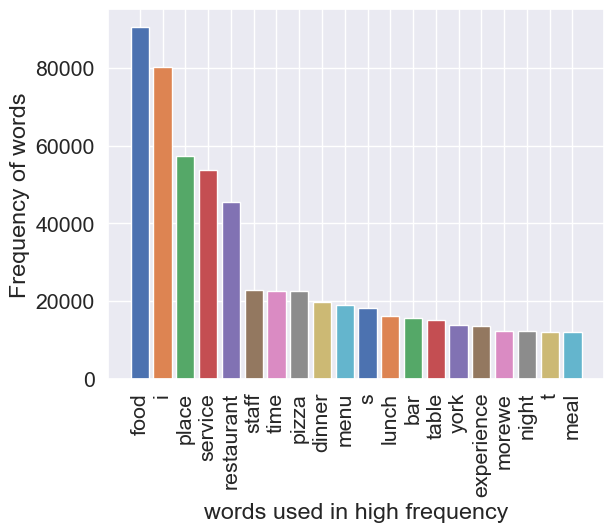

In [ ]:
frequency_word = freq_nouns.most_common(20)
for f in range(len(frequency_word)):
    x,y = frequency_word[f]
    plt.bar(x,y)
    plt.xticks(rotation=90)
plt.xlabel('words used in high frequency')
plt.ylabel('Frequency of words')
plt.savefig('word_frequency_20.png')

for category, we got food, place, service, restaurant

----------------------------------------------------------------------

## use classifier that we trained before to get the P/N value for each category in different text review

tokenize each review text to sentence list, and do TF-IDF for each sentence, and combine them to four paragraph, and then predict the classification of these paragraph to get the P/N label of each category

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize
vec = TfidfVectorizer()

In [ ]:
# rebuild the all_review, do not remove punctuation
all_review = []
for i in range(len(restaurant_data)):
  for j in range(len(literal_eval(restaurant_data['review text'][i]))):
    review = literal_eval(restaurant_data['review text'][i])[j]
    review = review.lower()
    review = review.split()
    filter_sentence = [ps.stem(w) for w in review if not w in set(stopwords.words('english'))]
    filter_sentence = ' '.join(review)
    all_review.append(filter_sentence)

In [ ]:
# category 
food = []
place = []
service = []
wait_time = []

In [ ]:
for i in range(len(all_review)):
    sentences = sent_tokenize(all_review[i])
    paragraph_food = ''
    paragraph_place = ''
    paragraph_service = ''
    paragraph_wait_time = ''
    for sentence in sentences:
        sentence = re.sub('[^a-zA-Z]',' ',sentence)
        # a = word_tokenize(sentence)
        # if a == []:
        #     continue
        try:
            tf_idf = vec.fit_transform([sentence])
        except:
            continue
        feature = vec.get_feature_names_out()
        if ('food' in feature or 'pizza' in feature or 'dinner' in feature or 'lunch' in feature or 'meal' in feature or 'menu' in feature or 'taste' in feature):
            paragraph_food += sentence + ' '
        if ('place' in feature or 'restaurant' in feature or 'location' in feature or 'bar' in feature or 'atmosphere' in feature):
            paragraph_place += sentence + ' '
        if ('service' in feature or 'staff' in feature or 'quality' in feature or 'experience' in feature or 'order' in feature):
            paragraph_service += sentence + ' '
        if ('time' in feature or 'wait' in feature or 'reservation' in feature or 'waitlist' in feature):
            paragraph_wait_time += sentence + ' '
        # now we get four paragraph for each category
    # predict the P/N value for each paragraph, check if paragraph == ''
    paragraph_food = re.sub('[^a-zA-Z]',' ',paragraph_food)
    paragraph_place = re.sub('[^a-zA-Z]',' ',paragraph_place)
    paragraph_service = re.sub('[^a-zA-Z]',' ',paragraph_service)
    paragraph_wait_time = re.sub('[^a-zA-Z]',' ',paragraph_wait_time)
    if paragraph_food == '':
        food.append(0)
    else:
        food.append(pipeline.predict([paragraph_food])[0])
    if paragraph_place == '':
        place.append(0)
    else:
        place.append(pipeline.predict([paragraph_place])[0])
    if paragraph_service == '':
        service.append(0)
    else:
        service.append(pipeline.predict([paragraph_service])[0])
    if paragraph_wait_time == '':
        wait_time.append(0)
    else:
        wait_time.append(pipeline.predict([paragraph_wait_time])[0])
        


KeyboardInterrupt: 

76489

Now, we get the review with category P/N

In [ ]:
len(food)
y_rate = []
y = []
for i in range(len(restaurant_data)):
    y.extend(literal_eval(restaurant_data['each rate value'].values[i]))
y = np.array(y)
for i in range(76489):
    y_rate.append(y[i])
# print(y_rate)


In [ ]:
categories_review ={
    "food" : food,
    "place" : place,
    "service" : service,
    "wait time" : wait_time,
    "rating" : y_rate
}
categories_review = pd.DataFrame(categories_review)
categories_review.head()

,food,place,service,wait time,rating
0,0.0,1.0,1.0,0.0,4.0
1,1.0,0.0,1.0,1.0,5.0
2,1.0,1.0,-1.0,1.0,1.0
3,1.0,0.0,1.0,0.0,5.0
4,0.0,0.0,1.0,0.0,5.0


       food  place  service  wait time  rating
0       0.0    1.0      1.0        0.0     4.0
1       1.0    0.0      1.0        1.0     5.0
2       1.0    1.0     -1.0        1.0     1.0
3       1.0    0.0      1.0        0.0     5.0
4       0.0    0.0      1.0        0.0     5.0
...     ...    ...      ...        ...     ...
76484   1.0    0.0      1.0        0.0     4.0
76485   1.0    1.0      0.0        0.0     5.0
76486   1.0    0.0      1.0        1.0     5.0
76487   1.0    0.0      0.0        0.0     3.0
76488   1.0    0.0      1.0        0.0     4.0

[76489 rows x 5 columns]
[[1.         0.09667293 0.21006299 0.00729236 0.22960182]
 [0.09667293 1.         0.07643556 0.01534478 0.12240179]
 [0.21006299 0.07643556 1.         0.02250872 0.18730304]
 [0.00729236 0.01534478 0.02250872 1.         0.04810579]
 [0.22960182 0.12240179 0.18730304 0.04810579 1.        ]]


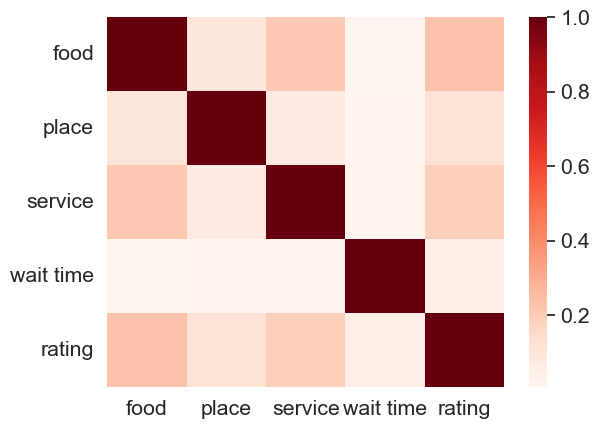

In [ ]:
keywords = ["food" ,
    "place" ,
    "service" ,
    "wait time",
    "rating" ]
print(categories_review)
corr = np.corrcoef(categories_review.to_numpy().T)
print(corr)
corr_matrix = pd.DataFrame(corr, columns=keywords,index=keywords)
sns.heatmap(corr_matrix,cmap='Reds')
plt.savefig('correlation_matrix_category.svg')

In [ ]:
categories_review.to_csv('./categories_review_76489.csv')

change the reviews to the restaurant, W = P+ - P- / P+ + P-

In [ ]:
restaurant_name = []
for i in range(len(restaurant_data)):
    restaurant.append(restaurant_data['restaurant name'][i])

food_res = []
place_res = []
service_res = []
wait_time_res = []
index = 0
for i in range(len(restaurant_data)):
  food_p = 0
  food_n = 0
  place_p = 0
  place_n = 0
  service_p = 0
  service_n = 0
  wait_time_p = 0
  wait_time_n = 0
  for j in range(len(literal_eval(restaurant_data['review text'][i]))):
    if food[index] == 1:
      food_p += 1
    elif food[index] == -1:
      food_n += 1
    if place[index] == 1:
      place_p += 1
    elif place[index] == -1:
      place_n += 1
    if service[index] == 1:
      service_p += 1
    elif service[index] == -1:
      service_n += 1
    if food[index] == 1:
      wait_time_p += 1
    elif food[index] == -1:
      wait_time_n += 1
    index += 1
  if (food_p - food_n) == 0:
    food_res.append(0)
  else:
    food_res.append((food_p - food_n)/(food_p + food_n))
  if (place_p - place_n) == 0:
    place_res.append(0)
  else:
    place_res.append((place_p - place_n)/(place_p + place_n))
  if (service_p - service_n) == 0:
    service_res.append(0)
  else:
    service_res.append((service_p - service_n)/(service_p + service_n))
  if (wait_time_p - wait_time_n) == 0:
    wait_time_res.append(0)
  else:
    wait_time_res.append((wait_time_p - wait_time_n)/(wait_time_p + wait_time_n))

IndexError: list index out of range

In [ ]:
restaurant_name = []
for i in range(142):
    restaurant_name.append(restaurant_data['restaurant name'][i])
len(restaurant_name)

142

In [ ]:
restaurant_category = {
    "restaurant name" : restaurant_name,
     "food": food_res,
     "place": place_res,
     "service": service_res,
     "wait time": wait_time_res
}
restaurant_category = pd.DataFrame(restaurant_category)
restaurant_category.head()

,restaurant name,food,place,service,wait time
0,ICHIRAN Brooklyn,0.727273,0.846154,0.760000,0.727273
1,Tom's Restaurant,0.870504,0.952756,0.900826,0.870504
2,Ivan Ramen,0.972603,0.958333,0.967213,0.972603
3,Sweet Chick,0.941176,0.961290,0.931034,0.941176
4,Boucherie West Village,0.970588,0.973013,0.951952,0.970588


In [ ]:
restaurant_category

,restaurant name,food,place,service,wait time
0,ICHIRAN Brooklyn,0.727273,0.846154,0.760000,0.727273
1,Tom's Restaurant,0.870504,0.952756,0.900826,0.870504
2,Ivan Ramen,0.972603,0.958333,0.967213,0.972603
3,Sweet Chick,0.941176,0.961290,0.931034,0.941176
4,Boucherie West Village,0.970588,0.973013,0.951952,0.970588
...,...,...,...,...,...
137,Joe's Shanghai,0.788530,0.928437,0.774278,0.788530
138,Palma,0.885932,0.949153,0.921788,0.885932
139,Westville Hudson,0.966387,0.976190,0.974684,0.966387
140,Roxy Bar,0.932203,0.960000,0.892857,0.932203


In [ ]:
restaurant_category.to_csv('./restaurant_category_142.csv')